## Trabajo Práctico 2: Redes Neuronales


Los parámetros que tendremos en cuenta al entrenar las redes neuronales seran:

+ Función de costo: Una forma para que la red entiende si predijo correctamente, en este caso como buscamos una clasificacion binaria utilizaremos binary cross entropy.
+ Optimizador: Es el algoritmo mediante el cual se optimiza el función de costo. En este caso probaremos los distintos optimizadores que nos probee keras: SGD, Adam, Adadelta, etc...
+ Tasa de aprendizaje: Es un parámetro que indica la velocidad con la cual el optimizador intenta acercarse el mínimo de la función de pérdida.
+ Funcion de activacion de las neuronas: Se aplica sobre el input de cada neurona, antes de multiplicarla por el peso correspondiente (El famoso pegamento no lineal).
+ Cantidad de capas y neuronas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

RANDOM_STATE = 19 * 103785
tf.random.set_seed(RANDOM_STATE)

from tensorflow.keras import regularizers
physical_devices = tf.config.list_physical_devices('GPU')

try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [8]:
from preprocesamiento import feature_engineering
from preprocesamiento import obtenerDFTraining
from preprocesamiento import preprocesar_data_frame
from preprocesamiento import prepros_dummies
from preprocesamiento import preprocesar_normalize_scaler
from preprocesamiento import metricas
from preprocesamiento import obtenerDFHoldout

In [6]:
def plot_loss(history):
    plt.figure(dpi=125, figsize=(8, 4))
    plt.plot(history['loss'], label="loss")
    plt.plot(history['val_loss'], label="validation loss")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show() 
    
def plot_acc(history):
    plt.figure(dpi=125, figsize=(8, 4))
    plt.plot(history['accuracy'], label="accuracy")
    plt.plot(history['val_accuracy'], label="validation accuracy")
    plt.title('model accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [7]:
df = obtenerDFTraining()
(X,y) = preprocesar_data_frame(df)
X_prepos = prepros_dummies(X[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
X_prepos = preprocesar_normalize_scaler(X_prepos)
x_train, x_test, y_train, y_test = train_test_split(X_prepos, y, test_size=0.25, random_state=RANDOM_STATE)

Inicialmente probaremos con una unica capa oculta e iremos complejizando la red poco a poco

In [15]:
model1 = Sequential()
model1.add(Dense(80, activation='relu',input_shape=(25,)))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model1.summary()

h = model1.fit(x_train, y_train, epochs=1200,batch_size=50, verbose=4, validation_split=0.3)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1200
Epoch 2/1200
Epoch 3/1200
Epoch 4/1200
Epoch 5/1200
Epoch 6/1200
Epoch 7/1200
Epoch 8/1200
Epoch 9/1200
Epoch 10/1200
Epoch 11/1200
Epoch 12/1200
Epoch 13/1200
Epoch 14/1200
Epoch 15/1200
Epoch 16/1200
Epoch 17/1200
Epoch 18/1200
Epoch 19/1200
Epoch 20/1200
Epoch 21/1200
Epoch 22/1200
Epoch 23/1200
Epoch 24/1200
Epoch 25/1200
Epoch 26/1200
Epoch 27/1200
Epoch 28/1200

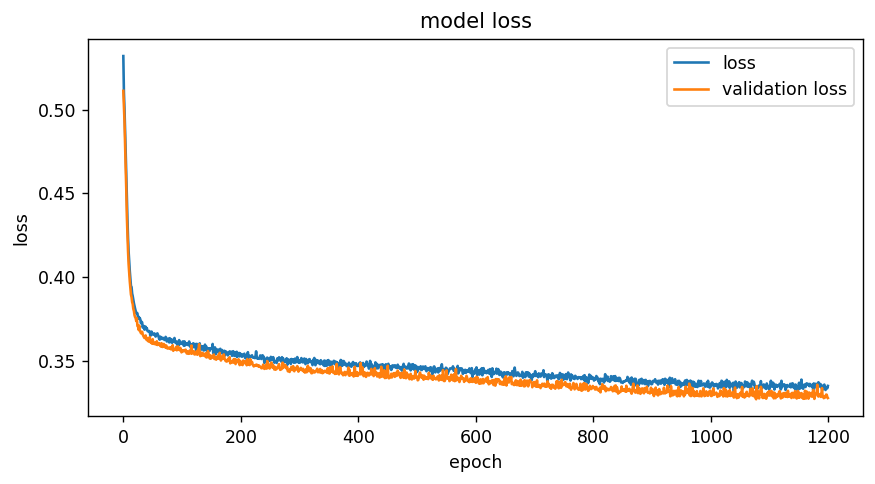

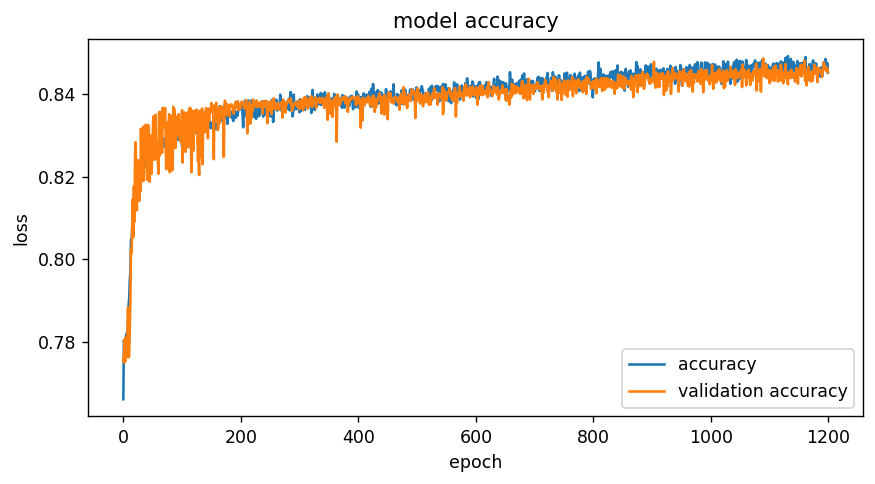

              precision    recall  f1-score   support

           0     0.8746    0.9162    0.8949      6196
           1     0.6837    0.5795    0.6273      1936

    accuracy                         0.8361      8132
   macro avg     0.7792    0.7479    0.7611      8132
weighted avg     0.8292    0.8361    0.8312      8132



array([[2.7452630e-01],
       [9.9245197e-01],
       [7.6848269e-04],
       ...,
       [1.0171235e-03],
       [3.2805949e-02],
       [6.3684523e-02]], dtype=float32)

In [18]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict_classes(x_test),digits= 4))

## Probando otro Optimizador


In [11]:
model2 = Sequential()
model2.add(Dense(80, activation='relu',input_shape=(25,)))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.SGD(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model2.summary()

h = model2.fit(x_train, y_train, epochs=1200,batch_size=1000, verbose=0, validation_split=0.3)
print(classification_report(y_test,h.model.predict_classes(x_test)))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 81        
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6196
           1       0.60      0.21      0.31      1936

    accuracy                           0.78      8132
   macro avg       0.70      0.58      0.59      8132
weighted avg       0.75      0.78      0.74      8132



## Agregando una nueva capa

In [12]:
model3 = Sequential()
model3.add(Dense(80, activation='relu',input_shape=(25,)))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model3.summary()

h = model3.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 80)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                810       
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


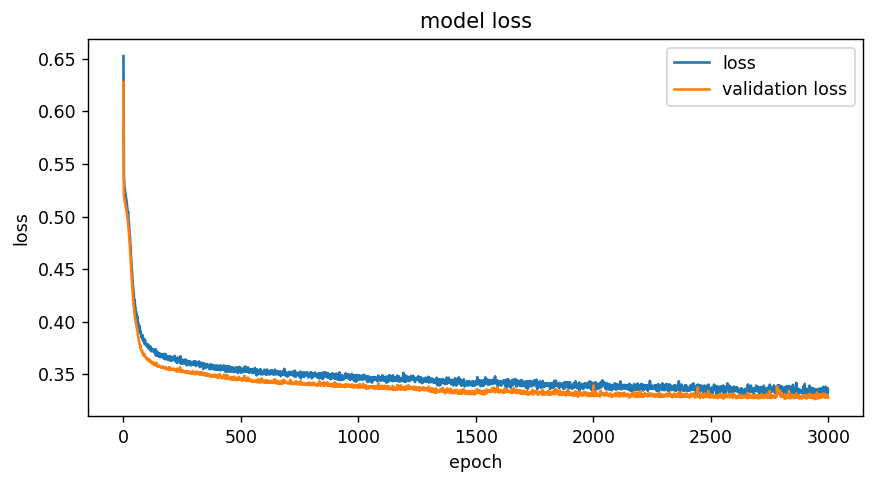

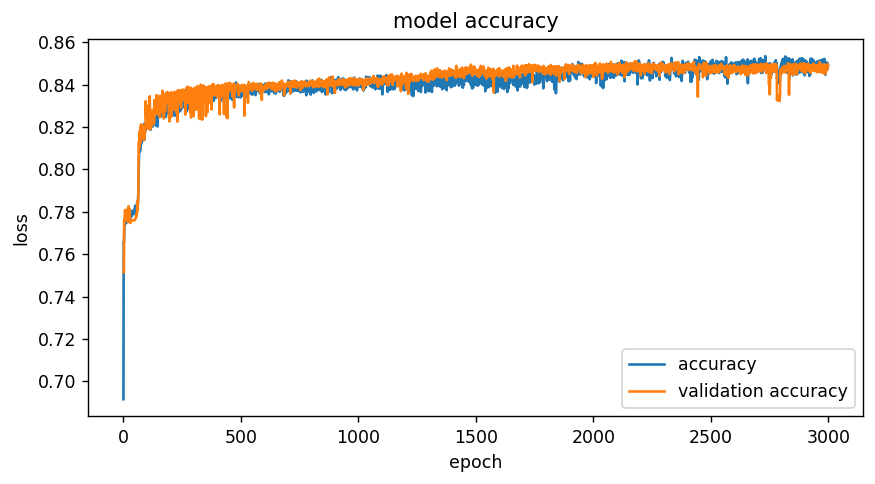

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6196
           1       0.72      0.56      0.63      1936

    accuracy                           0.84      8132
   macro avg       0.79      0.74      0.76      8132
weighted avg       0.83      0.84      0.83      8132



In [13]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict_classes(x_test)))

In [19]:
model4 = Sequential()
model4.add(Dense(80, activation='relu',input_shape=(25,)))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='relu'))
model4.add(Dropout(0.25))
model4.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adagrad(learning_rate=0.001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model4.summary()

h = model4.fit(x_train, y_train, epochs=3000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_12 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                810       
_________________________________________________________________
dropout_13 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 2,901
Trainable params: 2,901
Non-trainable params: 0
_________________________________________________________________


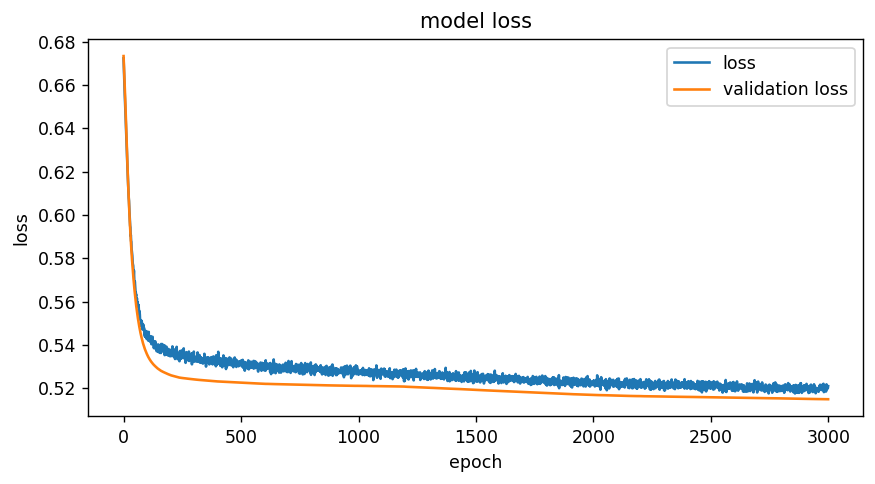

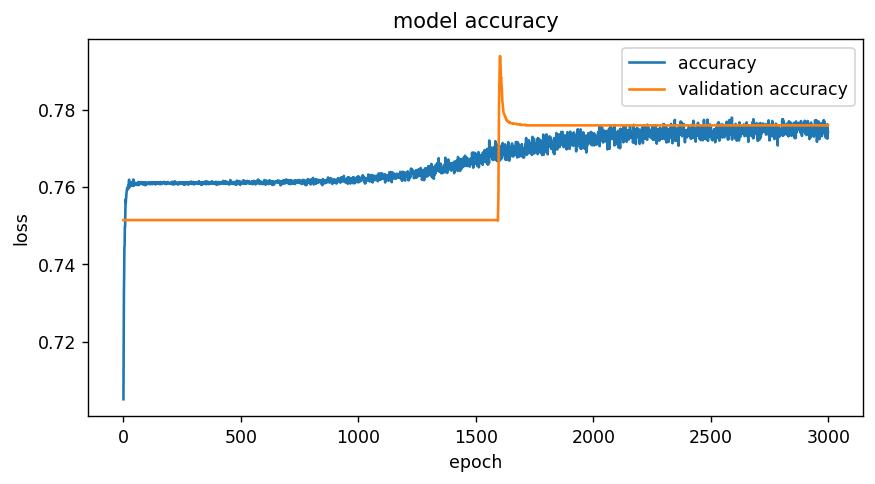

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      6196
           1       0.60      0.21      0.31      1936

    accuracy                           0.78      8132
   macro avg       0.70      0.58      0.59      8132
weighted avg       0.75      0.78      0.74      8132



In [20]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.5))

In [68]:
model5 = Sequential()
model5.add(Dense(80, activation='relu',input_shape=(25,)))
model5.add(Dropout(0.5))
model5.add(Dense(40, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(5, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model5.summary()

h = model5.fit(x_train, y_train, epochs=4000,batch_size=1000, verbose=0, validation_split=0.3)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 80)                2080      
_________________________________________________________________
dropout_44 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 40)                3240      
_________________________________________________________________
dropout_45 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 5)                 205       
_________________________________________________________________
dropout_46 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_68 (Dense)             (None, 1)               

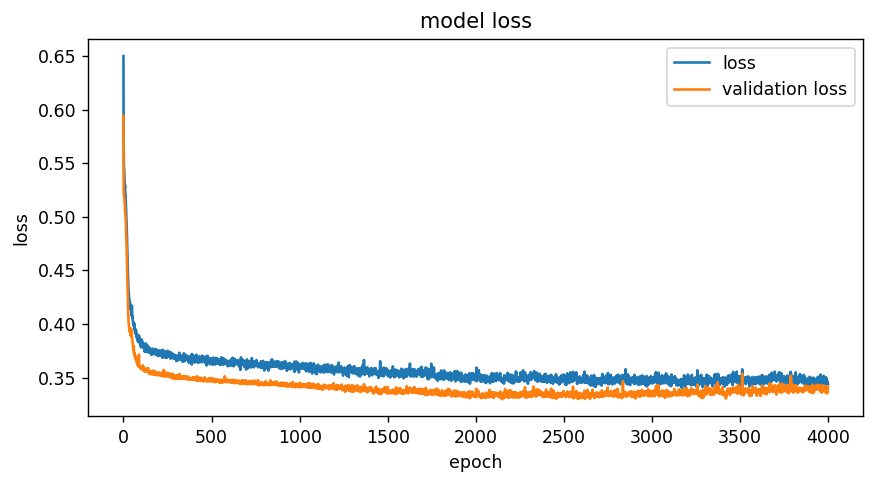

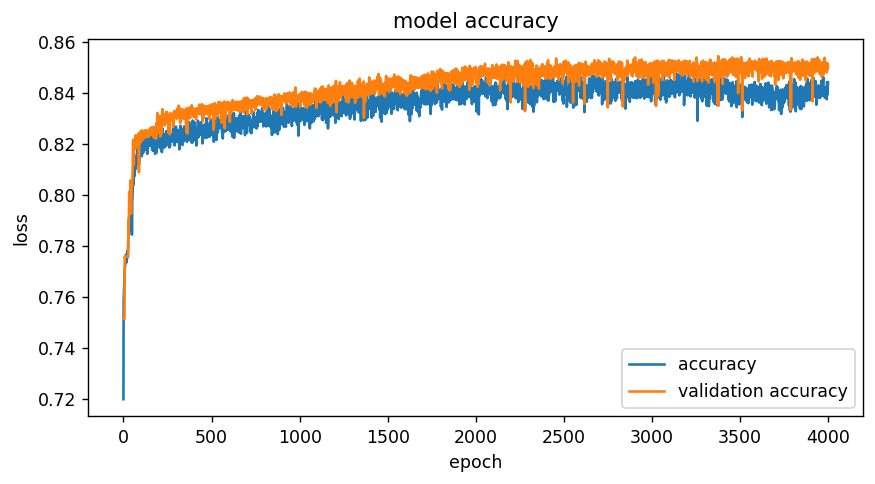

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6196
           1       0.72      0.56      0.63      1936

    accuracy                           0.84      8132
   macro avg       0.80      0.75      0.76      8132
weighted avg       0.84      0.84      0.84      8132



In [69]:
plot_loss(h.history)
plot_acc(h.history)
print(classification_report(y_test,h.model.predict_classes(x_test)))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                1300      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 12)                612       
_________________________________________________________________
dropout_8 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 13        
Total params: 1,925
Trainable params: 1,925
Non-trainable params: 0
_________________________________________________________________


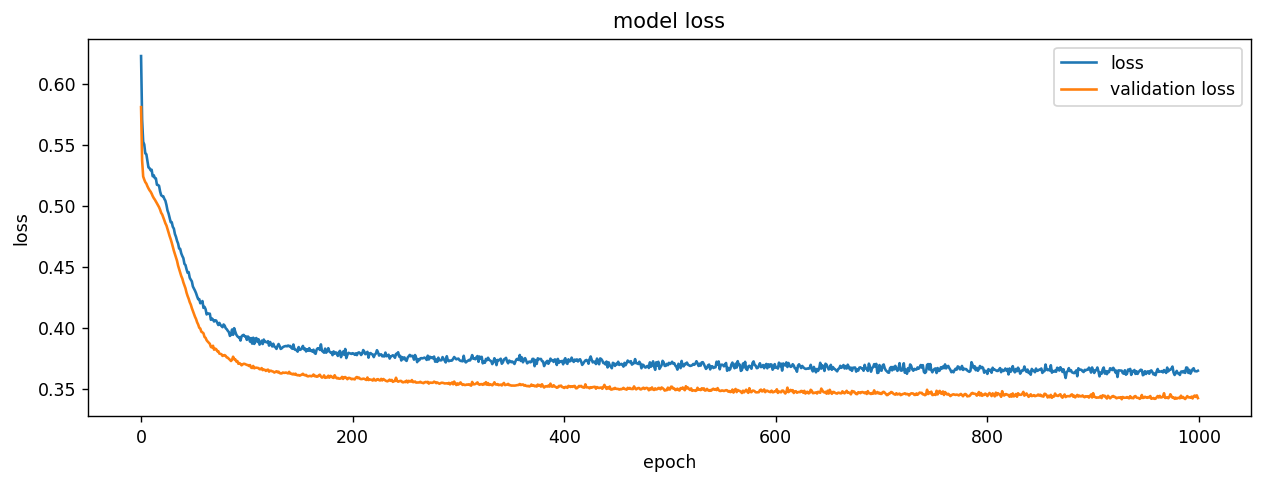

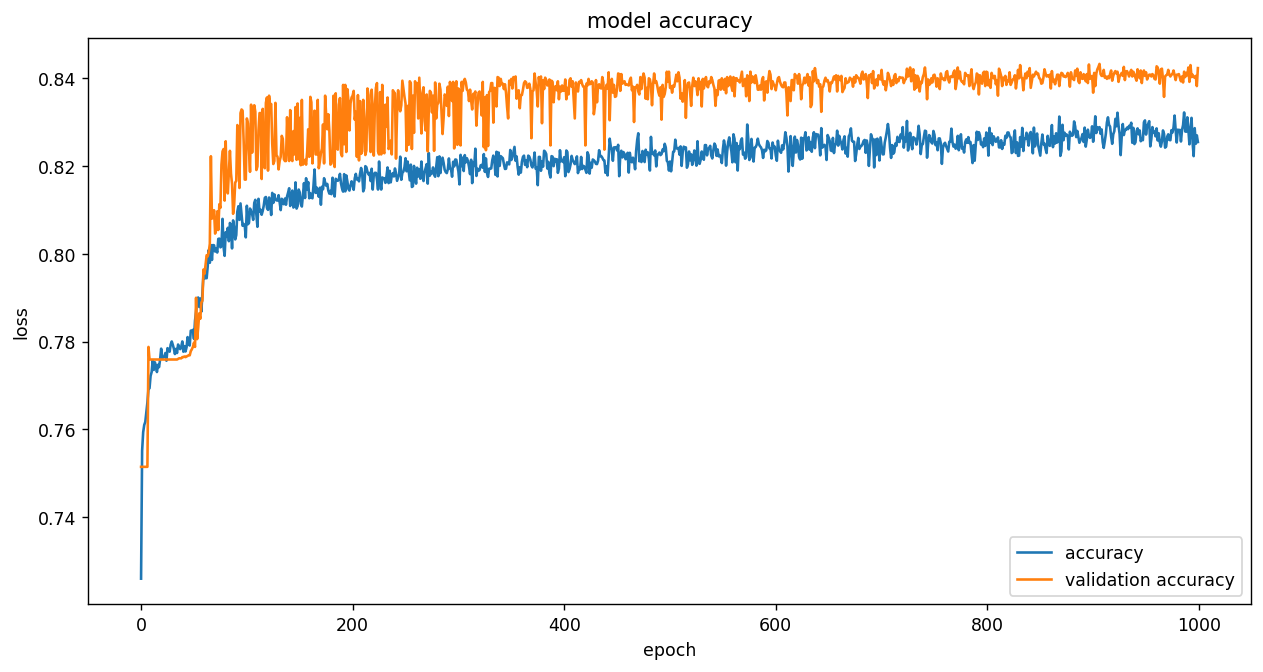

0.7386256

In [22]:
model6 = Sequential()
model6.add(Dense(50, activation='relu', input_shape=(25,)))
model6.add(Dropout(0.5))
model6.add(Dense(12, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam()
model6.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

model6.summary()

h = model6.fit(x_train, y_train, epochs=1000,batch_size=1000, verbose=0, validation_split=0.3)

plt.figure(dpi=125, figsize=(12, 4))
plt.plot(h.history['loss'], label="loss")
plt.plot(h.history['val_loss'], label="validation loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.figure(dpi=125, figsize=(12, 6))
plt.plot(h.history['accuracy'], label="accuracy")
plt.plot(h.history['val_accuracy'], label="validation accuracy")
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

pred_red_neuronal = h.model.predict(x_test)
pred = []
for i in range(0,len(pred_red_neuronal)):
    if (pred_red_neuronal[i] < 0.5):
        pred.append(0)
    else:
        pred.append(1)

m = tf.keras.metrics.AUC()
m.update_state(y_test,pred)
m.result().numpy()

In [9]:
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.5))
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.45))
print(classification_report(y_test,h.model.predict(x_test,verbose =4 )>0.40))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6196
           1       0.70      0.52      0.60      1936

    accuracy                           0.83      8132
   macro avg       0.78      0.73      0.75      8132
weighted avg       0.82      0.83      0.83      8132

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6196
           1       0.68      0.56      0.62      1936

    accuracy                           0.83      8132
   macro avg       0.78      0.74      0.76      8132
weighted avg       0.83      0.83      0.83      8132

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6196
           1       0.66      0.60      0.63      1936

    accuracy                           0.83      8132
   macro avg       0.77      0.75      0.76      8132
weighted avg       0.82      0.83      0.83      8132



### Prediccion sobre el Holdout

In [11]:
holdout = obtenerDFHoldout()

ids = np.array(holdout['id'])

holdout = prepros_dummies(holdout[['ganancia_perdida_declarada_bolsa_argentina','trabajo','horas_trabajo_registradas',
                                      'estado_marital','edad','genero','anios_estudiados','horas_trabajo_registradas']])
holdout = preprocesar_normalize_scaler(holdout)

predicciones_holdout = model5.predict_classes(holdout)
escribir_predicciones_a_archivo(predicciones_holdout,"Red Neuronal",ids)

NameError: name 'Normalizer' is not defined